In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from scipy import stats
plt.style.use('seaborn-whitegrid')

In [2]:
ibm=pd.read_csv('ibm.csv')
ibm.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [3]:
ibm.isnull().sum()

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

In [4]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [5]:
ibm.describe(include='all')

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
count,2466.000000,2466,2466,2.466000e+03,2466,2466,2466.000000,2466,2466,2466,2466.00000,2466.000000
unique,NaN,100,91,NaN,681,681,NaN,2,695,2,NaN,NaN
top,NaN,9149-MATVB,3/3/2012,NaN,12/30/2012,1/29/2013,NaN,No,4/28/2013,Paper,NaN,NaN
freq,NaN,36,58,NaN,10,10,NaN,1905,10,1263,NaN,NaN
mean,620.446067,NaN,NaN,4.978431e+09,NaN,NaN,59.895856,NaN,NaN,NaN,26.44485,3.442417
std,215.933610,NaN,NaN,2.884272e+09,NaN,NaN,20.435838,NaN,NaN,NaN,12.33493,6.290607
min,391.000000,NaN,NaN,6.113650e+05,NaN,NaN,5.260000,NaN,NaN,NaN,0.00000,0.000000
25%,406.000000,NaN,NaN,2.528854e+09,NaN,NaN,46.400000,NaN,NaN,NaN,18.00000,0.000000
50%,770.000000,NaN,NaN,4.964228e+09,NaN,NaN,60.560000,NaN,NaN,NaN,26.00000,0.000000
75%,818.000000,NaN,NaN,7.494512e+09,NaN,NaN,73.765000,NaN,NaN,NaN,35.00000,5.000000


In [6]:
ibm.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate'],
      dtype='object')

In [7]:
ibm['InvoiceDate']=pd.to_datetime(ibm['InvoiceDate'])

In [8]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   countryCode    2466 non-null   int64         
 1   customerID     2466 non-null   object        
 2   PaperlessDate  2466 non-null   object        
 3   invoiceNumber  2466 non-null   int64         
 4   InvoiceDate    2466 non-null   datetime64[ns]
 5   DueDate        2466 non-null   object        
 6   InvoiceAmount  2466 non-null   float64       
 7   Disputed       2466 non-null   object        
 8   SettledDate    2466 non-null   object        
 9   PaperlessBill  2466 non-null   object        
 10  DaysToSettle   2466 non-null   int64         
 11  DaysLate       2466 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 231.3+ KB


In [9]:
ibm.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [10]:
# creating a new column  

ibm['Late']=ibm['DaysLate'].apply(lambda x:1 if x>0 else 0)

In [11]:
ibm.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1


In [12]:
ibm['countlate']=ibm['Late'].eq(1).groupby(ibm.customerID).apply(lambda x:x.cumsum().shift().fillna(0).astype(int))

In [13]:
ibm.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0


In [14]:
ibm.countlate.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [15]:
ibm.countlate.value_counts()

0     656
1     393
2     247
4     158
3     154
5     146
6      93
7      76
8      73
9      63
10     55
11     52
12     49
13     48
14     40
15     29
16     26
18     21
17     20
19     17
20     12
21     10
22      8
23      5
24      5
25      3
26      1
27      1
28      1
29      1
30      1
31      1
32      1
Name: countlate, dtype: int64

In [16]:
ibm.countryCode.value_counts()

391    616
406    561
770    506
897    396
818    387
Name: countryCode, dtype: int64

In [17]:
temp=pd.DataFrame(ibm.groupby(['countryCode'],axis=0,as_index=False)['DaysLate'].mean())
temp

,countryCode,DaysLate
0,391,1.853896
1,406,3.941176
2,770,3.642292
3,818,4.816537
4,897,3.608586


Text(0.5, 1.0, 'Late payment country')

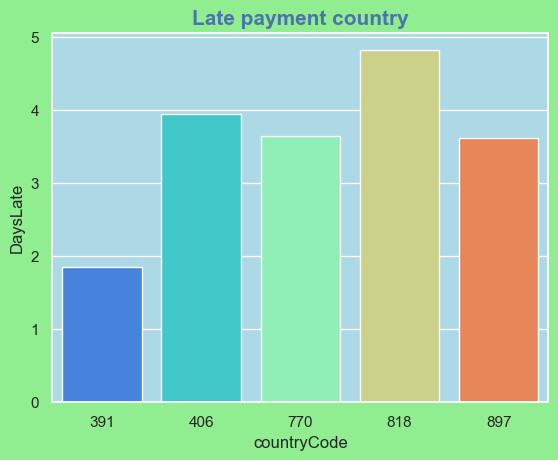

In [18]:
sns.set(rc= {'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

sns.barplot(x='countryCode',y='DaysLate',data=temp,palette='rainbow')
plt.title('Late payment country',fontsize=15,fontweight='bold',color='b')

In [19]:
late_country=ibm[['customerID','countryCode']]
late_country

,customerID,countryCode
0,0379-NEVHP,391
1,8976-AMJEO,406
2,2820-XGXSB,391
3,9322-YCTQO,406
4,6627-ELFBK,818
...,...,...
2461,6708-DPYTF,391
2462,9841-XLGBV,391
2463,7856-ODQFO,770
2464,7050-KQLDO,770


In [20]:
ibm.describe(include=np.object) 

C:\Users\user\AppData\Local\Temp\ipykernel_12692\4208372978.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ibm.describe(include=np.object)


,customerID,PaperlessDate,DueDate,Disputed,SettledDate,PaperlessBill
count,2466,2466,2466,2466,2466,2466
unique,100,91,681,2,695,2
top,9149-MATVB,3/3/2012,1/29/2013,No,4/28/2013,Paper
freq,36,58,10,1905,10,1263


In [21]:
ibm.PaperlessBill.value_counts()

Paper         1263
Electronic    1203
Name: PaperlessBill, dtype: int64

In [22]:
# looking for customer who too late to pay
customer_late=pd.crosstab(index=ibm['customerID'],columns=ibm['Late'])
customer_late.sort_values(by=[1],ascending=False)

Late,0,1
customerID,,
0688-XNJRO,2,32
8102-ABPKQ,1,26
8690-EEBEO,5,26
6708-DPYTF,5,25
4460-ZXNDN,3,25
...,...,...
6177-VTITE,21,0
6296-UKEUZ,19,0
6632-CGYHU,20,0


In [23]:
late=ibm[ibm['countryCode']==818]
late.sort_values(by=['DaysLate'],ascending=False)

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate
1327,818,9181-HEKGV,10/16/2013,5364802553,2012-12-30,1/29/2013,87.00,Yes,3/4/2013,Paper,64,34,1,11
907,818,9181-HEKGV,10/16/2013,3706686871,2012-04-16,5/16/2012,88.84,Yes,6/18/2012,Paper,63,33,1,6
718,818,9181-HEKGV,10/16/2013,2966579935,2013-05-18,6/17/2013,99.85,Yes,7/15/2013,Paper,58,28,1,5
2384,818,5613-UHVMG,5/31/2012,9652079777,2012-04-17,5/17/2012,54.93,Yes,6/14/2012,Paper,58,28,1,18
1240,818,5613-UHVMG,5/31/2012,4984149604,2012-01-24,2/23/2012,49.62,Yes,3/21/2012,Paper,57,27,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,818,5924-UOPGH,6/6/2013,5601820333,2013-09-25,10/25/2013,76.69,No,10/9/2013,Electronic,14,0,0,4
1381,818,6004-KITZM,9/1/2013,5606369890,2013-02-23,3/25/2013,70.90,No,3/15/2013,Paper,20,0,0,0
1382,818,7695-NKUXM,11/21/2012,5609216425,2012-11-16,12/16/2012,69.40,No,11/29/2012,Paper,13,0,0,0
394,818,3271-HYHDN,4/28/2013,1575926929,2012-11-19,12/19/2012,61.52,No,11/25/2012,Paper,6,0,0,0


In [24]:
ibm1=ibm[ibm['DaysLate']>0].copy()

In [25]:
ibm2=pd.DataFrame(ibm1.groupby(['customerID'],axis=0,as_index=False)['DaysLate'].count())
ibm2

,customerID,DaysLate
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [26]:
ibm_temp=ibm[ibm['customerID']=='0465-DTULQ']
ibm_temp['Late'].sum()
# ibm_temp

14

In [27]:
ibm2.columns=['customerID','Repeat cust']
ibm2

,customerID,Repeat cust
0,0379-NEVHP,1
1,0465-DTULQ,14
2,0625-TNJFG,5
3,0688-XNJRO,32
4,0706-NRGUP,10
...,...,...
78,9725-EZTEJ,13
79,9758-AIEIK,4
80,9841-XLGBV,2
81,9883-SDWFS,23


In [28]:
ibm3=pd.merge(ibm,ibm2,how='left',on='customerID')
ibm3

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,Repeat cust
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,NaN
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,391,6708-DPYTF,8/2/2012,9982796720,2013-10-18,11/17/2013,79.61,No,12/1/2013,Electronic,44,14,1,24,25.0
2462,391,9841-XLGBV,1/3/2013,9983237240,2012-09-19,10/19/2012,38.25,No,10/13/2012,Paper,24,0,0,2,2.0
2463,770,7856-ODQFO,8/5/2012,9986249860,2012-07-02,8/1/2012,67.59,No,7/27/2012,Paper,25,0,0,7,7.0
2464,770,7050-KQLDO,9/29/2012,9989225541,2012-04-27,5/27/2012,53.16,No,5/18/2012,Paper,21,0,0,5,5.0


In [29]:
ibm3['Repeat cust'].isnull().sum()

364

In [30]:
ibm3['Repeat cust'].fillna(0,inplace=True)

In [31]:
ibm3['Repeat cust'].isnull().sum()

0

<AxesSubplot:xlabel='Repeat cust', ylabel='DaysLate'>

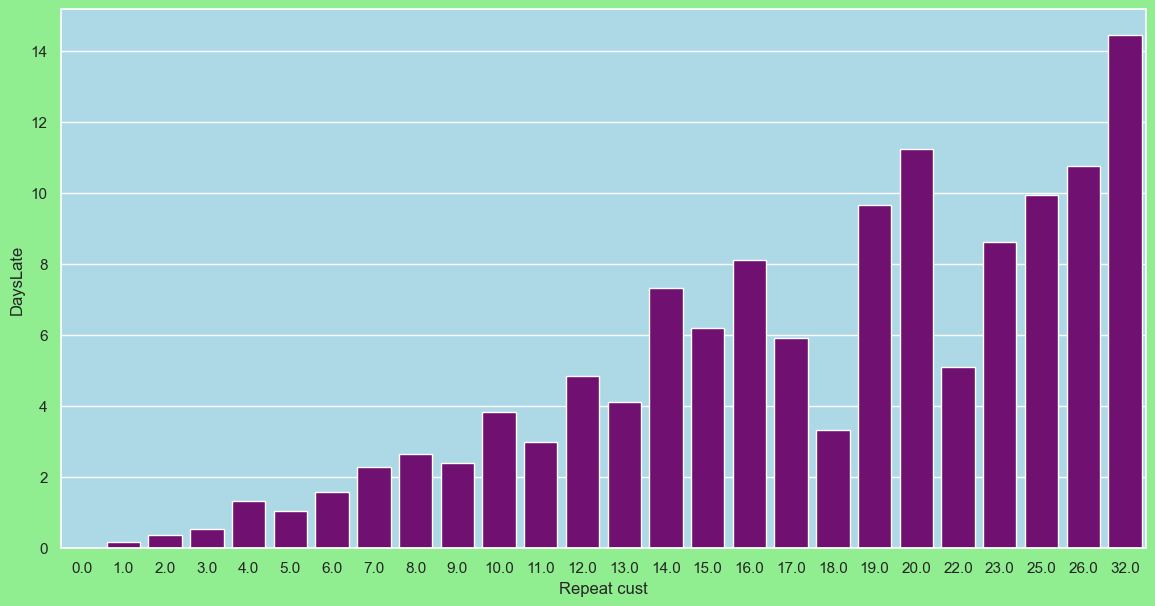

In [32]:
temp=pd.DataFrame(ibm3.groupby(['Repeat cust'],axis=0,as_index=False)['DaysLate'].mean())
plt.figure(figsize=(14,7))
sns.barplot(data=temp,x='Repeat cust',y='DaysLate',color='purple')

In [33]:
ibm3.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,Repeat cust
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,0.0
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0


In [34]:
def func_IA(x):
    if x>60: return " b. more than 60"
    else: return "a. less than 60"
ibm3['Invoiceamount_bin']=ibm3['InvoiceAmount'].apply(func_IA)

In [35]:
ibm3.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,Repeat cust,Invoiceamount_bin
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0,a. less than 60
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0,b. more than 60
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,0.0,b. more than 60
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0,b. more than 60
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0,b. more than 60


In [36]:
ibm3.Invoiceamount_bin.value_counts()

 b. more than 60    1260
a. less than 60     1206
Name: Invoiceamount_bin, dtype: int64

<AxesSubplot:xlabel='Invoiceamount_bin', ylabel='DaysLate'>

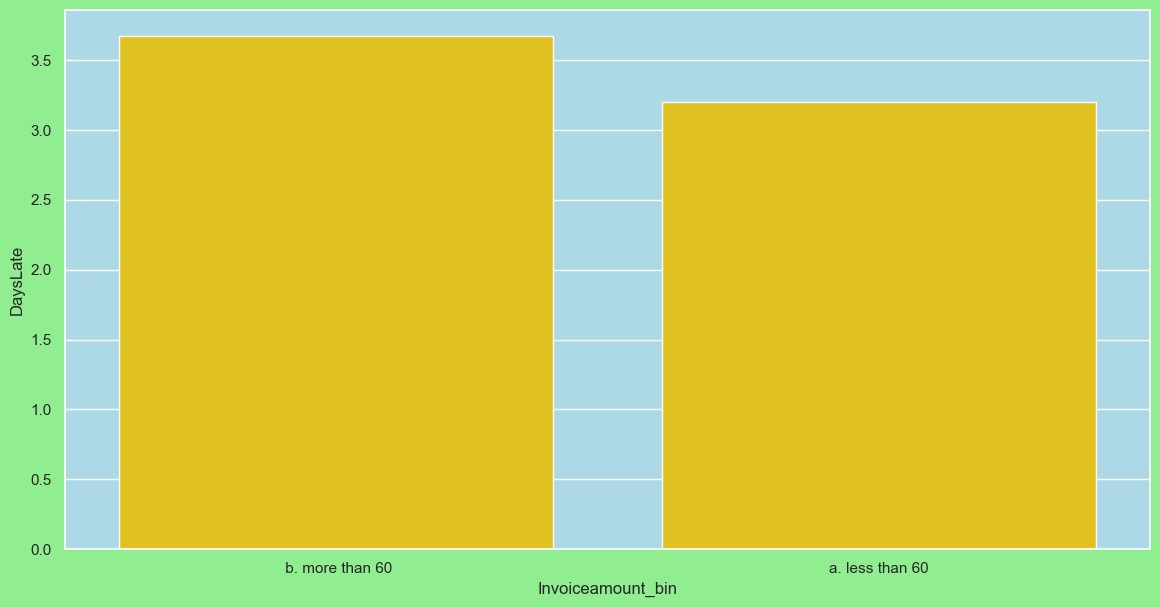

In [37]:
temp=pd.DataFrame(ibm3.groupby(['Invoiceamount_bin'],axis=0,as_index=False)['DaysLate'].mean())
plt.figure(figsize=(14,7))
sns.barplot(data=temp,x='Invoiceamount_bin',y='DaysLate',color='gold')

In [38]:
ibm3.columns

Index(['countryCode', 'customerID', 'PaperlessDate', 'invoiceNumber',
       'InvoiceDate', 'DueDate', 'InvoiceAmount', 'Disputed', 'SettledDate',
       'PaperlessBill', 'DaysToSettle', 'DaysLate', 'Late', 'countlate',
       'Repeat cust', 'Invoiceamount_bin'],
      dtype='object')

In [39]:
ibm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 0 to 2465
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   countryCode        2466 non-null   int64         
 1   customerID         2466 non-null   object        
 2   PaperlessDate      2466 non-null   object        
 3   invoiceNumber      2466 non-null   int64         
 4   InvoiceDate        2466 non-null   datetime64[ns]
 5   DueDate            2466 non-null   object        
 6   InvoiceAmount      2466 non-null   float64       
 7   Disputed           2466 non-null   object        
 8   SettledDate        2466 non-null   object        
 9   PaperlessBill      2466 non-null   object        
 10  DaysToSettle       2466 non-null   int64         
 11  DaysLate           2466 non-null   int64         
 12  Late               2466 non-null   int64         
 13  countlate          2466 non-null   int32         
 14  Repeat c

In [40]:
ibm3.PaperlessBill.unique()

array(['Paper', 'Electronic'], dtype=object)

In [41]:
ibm3['Disputed']=ibm['Disputed'].map({'No':0,'Yes':1})
ibm3['PaperlessBill']=ibm3['PaperlessBill'].map({'Paper':0 , 'Electronic':1})
ibm3.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,Repeat cust,Invoiceamount_bin
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1.0,a. less than 60
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,5.0,b. more than 60
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,0.0,b. more than 60
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,17.0,b. more than 60
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,9.0,b. more than 60


In [42]:
ibm3['InvoiceQuarter']=pd.to_datetime(ibm['InvoiceDate']).dt.quarter
ibm3.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,Repeat cust,Invoiceamount_bin,InvoiceQuarter
0,391,0379-NEVHP,4/6/2013,611365,2013-01-02,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1.0,a. less than 60,1
1,406,8976-AMJEO,3/3/2012,7900770,2013-01-26,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,5.0,b. more than 60,1
2,391,2820-XGXSB,1/26/2012,9231909,2013-07-03,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,0.0,b. more than 60,3
3,406,9322-YCTQO,4/6/2012,9888306,2013-02-10,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,17.0,b. more than 60,1
4,818,6627-ELFBK,11/26/2012,15752855,2012-10-25,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,9.0,b. more than 60,4


## check relation with late feature

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='countryCode', ylabel='count'>

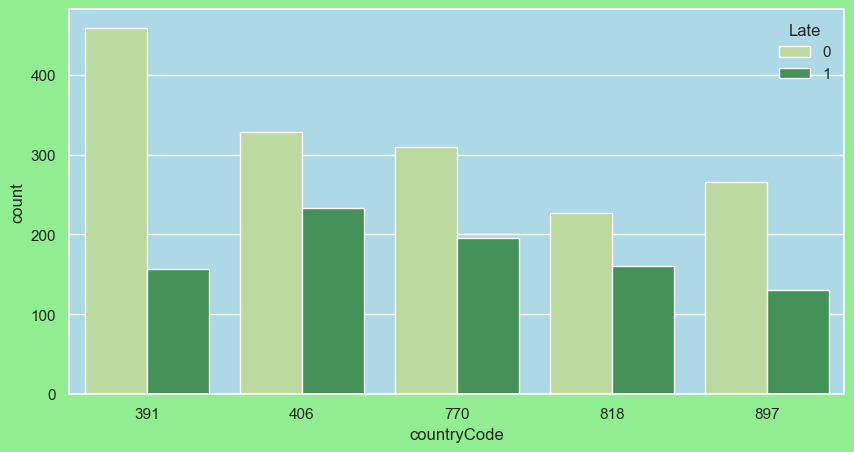

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(ibm3['countryCode'],hue=ibm['Late'],palette='YlGn')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InvoiceQuarter', ylabel='count'>

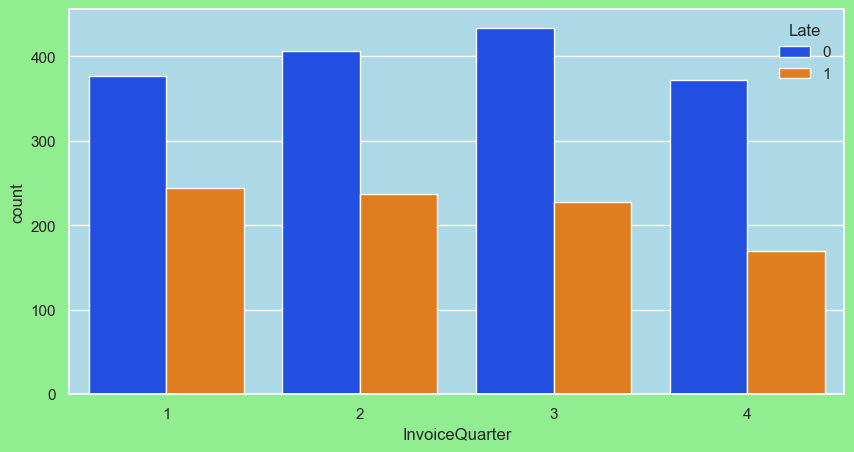

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(ibm3['InvoiceQuarter'],hue=ibm['Late'],palette='bright')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


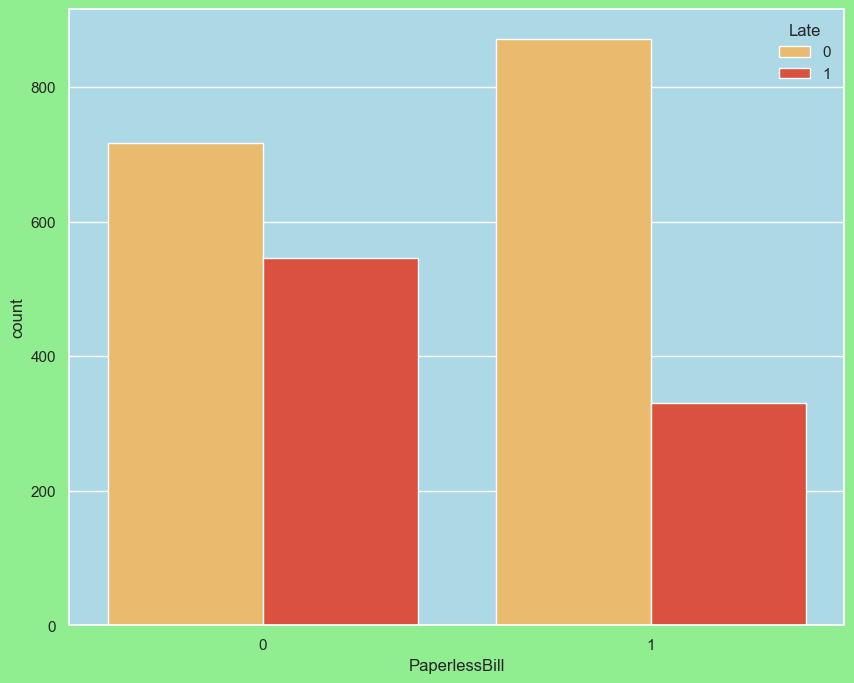

In [46]:
plt.figure(figsize=(10,8))
ax=sns.countplot(ibm3['PaperlessBill'],hue=ibm['Late'],palette='YlOrRd')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


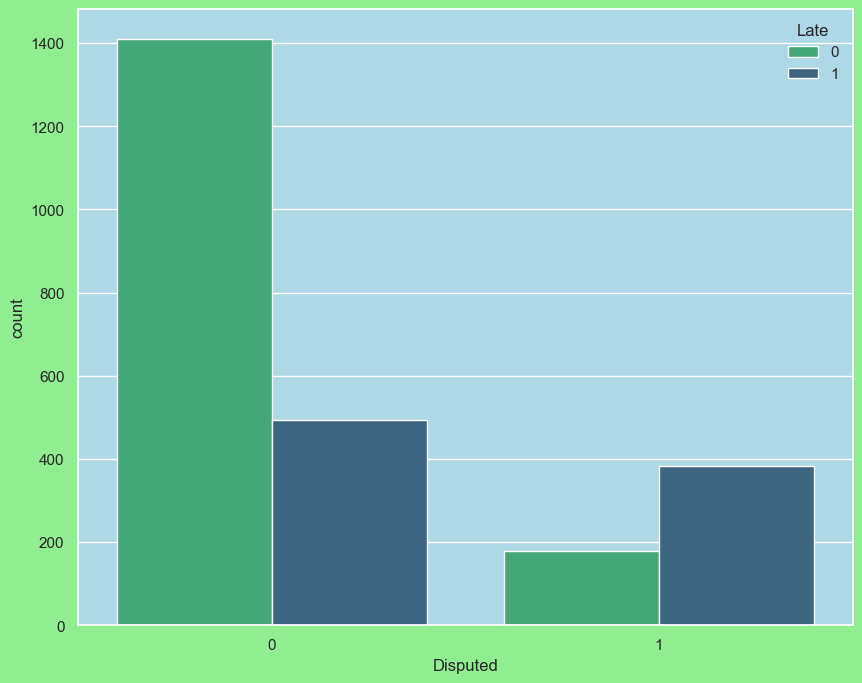

In [48]:
plt.figure(figsize=(10,8))
ax=sns.countplot(ibm3['Disputed'],hue=ibm['Late'],palette='viridis_r')

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

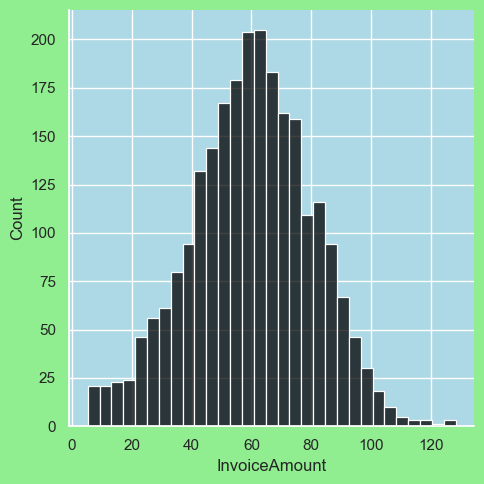

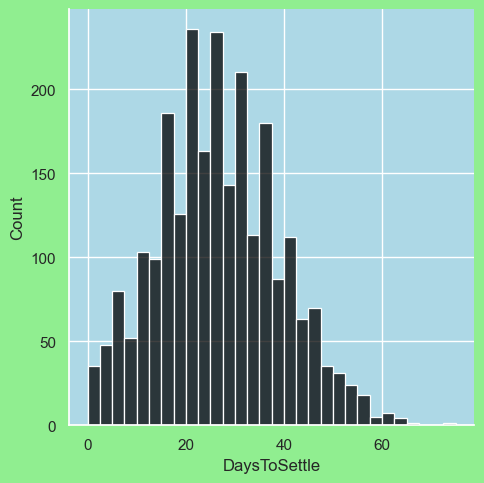

In [53]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.displot(ibm3['InvoiceAmount'],color='black')

plt.figure(figsize=(8,8))
plt.figure(2)
sns.displot(ibm3['DaysToSettle'],color='black')